In [102]:
import pandas as pd
colnames =['ID', 'Class', 'Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
df=pd.read_csv('../resource/academic.csv',names=colnames)
df.head(3)

,ID,Class,Gender (X1),Status IMT (X2),Berkacamata (X3),Pernah Sakit (X4),Gangguan Psikis (X5),Aktif Bertanya (X6),Aktif Menjawab (X7),Mengerjakan Tugas (X8),...,Mengulang Materi (X13),Praktek Mandiri (X14),Berdiskusi (X15),Memiliki HP (X16),Memiliki Laptop (X17),Kecukupan Kuota (X18),Dukungan Suasana rumah (X19),PLN (X20),Lokasi (X21),Ketersediaan Sinyal (X22)
0,1,0,P,NORMAL,Tidak,Tidak,Tidak,Ya,Ya,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Tidak,Kadang-kadang,Ya,Pedesaan,Sebagian
1,2,2,L,GEMUK,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Tidak,Ya,Ya,Ya,Ya,Ya,Perkotaan,Ya
2,3,2,P,NORMAL,Ya,Tidak,Tidak,Tidak,Tidak,Semua,...,Kadang-kadang,Kadang-kadang,Ya,Ya,Ya,Ya,Ya,Ya,Perkotaan,Sebagian


In [103]:
col =['Gender (X1)', 'Status IMT (X2)', 'Berkacamata (X3)', 'Pernah Sakit (X4)', 'Gangguan Psikis (X5)', 'Aktif Bertanya (X6)','Aktif Menjawab (X7)', 'Mengerjakan Tugas (X8)', 'Tertarik Materi (X9)', 'Alokasi Jam Belajar (X10)', 'Memiliki Referensi Tambahan (X11)', 'Browsing dan Youtube (X12)', 'Mengulang Materi (X13)', 'Praktek Mandiri (X14)', 'Berdiskusi (X15)', 'Memiliki HP (X16)', 'Memiliki Laptop (X17)', 'Kecukupan Kuota (X18)', 'Dukungan Suasana rumah (X19)', 'PLN (X20)', 'Lokasi (X21)', 'Ketersediaan Sinyal (X22)']
academic_df_dummies = pd.get_dummies(df, prefix=col)
print(academic_df_dummies)

    ID  Class  Gender (X1)_L  Gender (X1)_P  Status IMT (X2)_GEMUK  \
0    1      0              0              1                      0   
1    2      2              1              0                      1   
2    3      2              0              1                      0   
3    4      2              0              1                      0   
4    5      0              0              1                      0   
..  ..    ...            ...            ...                    ...   
86  87      1              1              0                      0   
87  88      2              1              0                      0   
88  89      0              1              0                      0   
89  90      1              1              0                      0   
90  91      2              1              0                      0   

    Status IMT (X2)_KURUS  Status IMT (X2)_NORMAL  Status IMT (X2)_OBESITAS  \
0                       0                       1                         0   
1

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate,cross_val_score
model=KNeighborsClassifier(n_neighbors=43, weights='distance')
X=academic_df_dummies.drop(['Class'],axis=1)
y=academic_df_dummies['Class']
cv_score1=cross_validate(model,X,y,cv=5, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [105]:
print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

1.0 0.4175438596491228


In [106]:
print(cv_score2.mean()) #test_score

0.33


In [107]:
def knn_predict(k) :
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model,X,y,cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

In [108]:
train_scores=[]
test_scores=[]
for k in range (2,100):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jacksh

<function matplotlib.pyplot.show(close=None, block=None)>

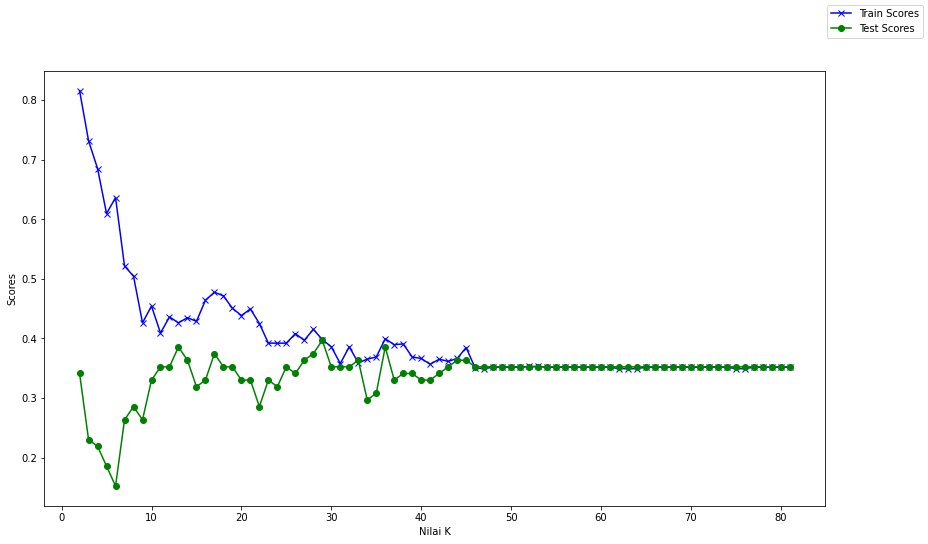

In [109]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,100),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,100),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={'n_neighbors':np.arange(2,4),'weights':['distance','uniform']}

model = KNeighborsClassifier()
svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(
    n_splits=10, n_repeats=100, random_state=0
)

gscv = GridSearchCV(model, param_grid=param_grid,
    scoring='accuracy', cv=cv
)
gscv.fit(X,y)

print(rscv.best_params_, rscv.best_score_)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/home/jacksh

{'weights': 'distance', 'n_neighbors': 38} 0.41812865497076024


In [127]:
import pandas as pd

results_df = pd.DataFrame(gscv.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])
print(results_df)
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003886      0.003583         0.003573        0.000997   
2       0.003358      0.000801         0.003172        0.000785   
1       0.003530      0.001004         0.003640        0.001141   
3       0.003306      0.000786         0.003381        0.000791   

  param_n_neighbors param_weights                                     params  \
0                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
2                 3      distance  {'n_neighbors': 3, 'weights': 'distance'}   
1                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
3                 3       uniform   {'n_neighbors': 3, 'weights': 'uniform'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0                0.6           0.555556           0.111111  ...   
2                0.6           0.444444           0.111111  ...   
1                0.5           0.333333           0.111111  ..

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
2_distance,"{'n_neighbors': 2, 'weights': 'distance'}",1,0.593133,0.159002
3_distance,"{'n_neighbors': 3, 'weights': 'distance'}",2,0.500222,0.163490
2_uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",3,0.470467,0.152695
3_uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",4,0.440156,0.159965


            split0_test_score  split1_test_score  split2_test_score  \
kernel                                                                
2_distance                0.6           0.555556           0.111111   
3_distance                0.6           0.444444           0.111111   
2_uniform                 0.5           0.333333           0.111111   
3_uniform                 0.5           0.333333           0.222222   

            split3_test_score  split4_test_score  split5_test_score  \
kernel                                                                
2_distance           0.555556           0.666667           0.777778   
3_distance           0.444444           0.555556           0.888889   
2_uniform            0.444444           0.555556           0.777778   
3_uniform            0.444444           0.444444           0.666667   

            split6_test_score  split7_test_score  split8_test_score  \
kernel                                                                
2_di

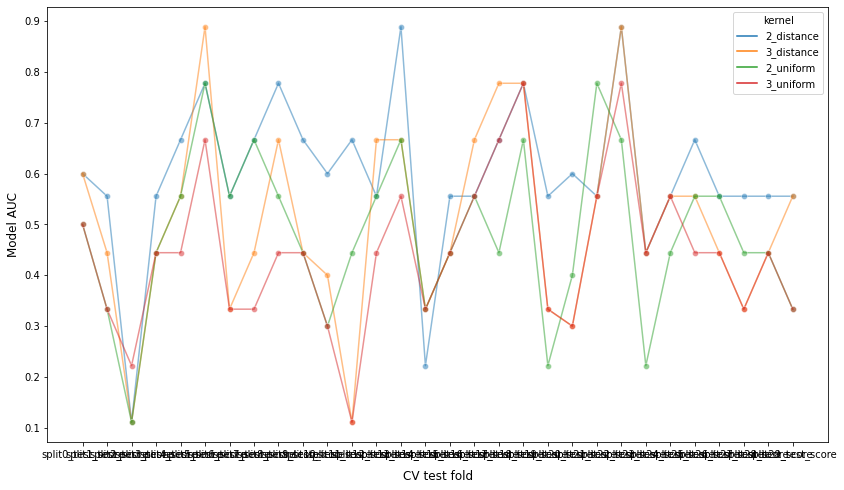

In [128]:
model_scores = results_df.filter(regex=r'split\d*_test_score')
print(model_scores)

fig,ax = plt.subplots(figsize=(14,8))
# plot 30 examples of dependency between cv fold and AUC scores
# fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
# ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds

In [142]:
#Tuning Hyperparameter KNN otomatis dengan RandomGridSearchCV , default iter =10
from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
rscv=RandomizedSearchCV(model, param_grid,n_iter=15, scoring='accuracy', cv=5)
rscv.fit(X,y)
print(rscv.best_params_, rscv.best_score_)

/home/jackshaw/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'weights': 'distance', 'n_neighbors': 39} 0.4175438596491228


             split0_test_score  split1_test_score  split2_test_score  \
kernel                                                                 
distance_39           0.421053           0.388889           0.388889   
uniform_20            0.315789           0.500000           0.388889   
uniform_16            0.315789           0.444444           0.388889   
distance_9            0.421053           0.444444           0.388889   
distance_18           0.421053           0.388889           0.388889   
uniform_21            0.315789           0.444444           0.388889   
distance_15           0.421053           0.444444           0.388889   
distance_6            0.421053           0.388889           0.333333   
distance_2            0.526316           0.444444           0.388889   
uniform_32            0.315789           0.333333           0.388889   
uniform_12            0.315789           0.388889           0.388889   
uniform_3             0.368421           0.388889           0.38

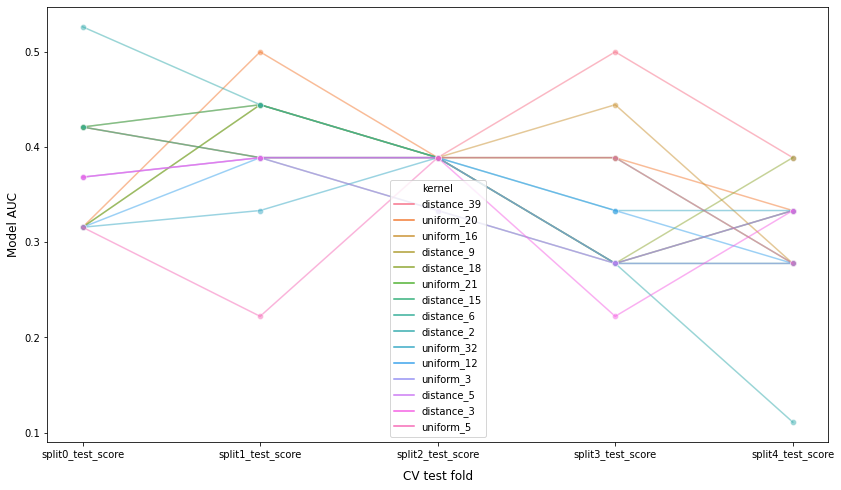

In [143]:
model_scores = results_df.filter(regex=r'split\d*_test_score')
print(model_scores)

fig,ax = plt.subplots(figsize=(14,8))
# plot 30 examples of dependency between cv fold and AUC scores
# fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
# ax.tick_params(bottom=True, labelbottom=False)
plt.show()